# One-Class Support Vector Machines

One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

สำหรับปัญหา anomaly detection จะ fit model ด้วย data กลุ่มเดียว(กลุ่มปกติ) เพื่อ predict ว่า instance ใหม่ๆที่เข้ามาเป็นข้อมูลปกติ หรือแปลกปลอม

### Ref : 
- https://github.com/nfmcclure/tensorflow_cookbook/tree/master/04_Support_Vector_Machines
- http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

### Overview

<img src="../../img/svm2.png" width="500px">

### Dataset

- MNIST from TF

```
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
```

### Setup

In [1]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
# import tensorflow as tf
# from tensorflow.python.framework import ops
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
from os import listdir
from PIL import Image
from mnist import MNIST

## Feature Vec $\in R^{2}$

#### Import data

In [2]:
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [16]:
print("X2 train shape :",np.array(X_train).shape)
print("X2 test shape :",np.array(X_test).shape)
print("X2 outlier shape :",np.array(X_test).shape)

X2 train shape : (200, 2)
X2 test shape : (40, 2)
X2 outlier shape : (40, 2)


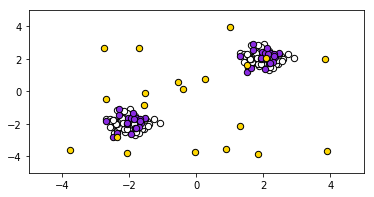

In [18]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
s = 40

plt.figure(figsize = (6,3))
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.show()

In [19]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [20]:
# Get the error
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

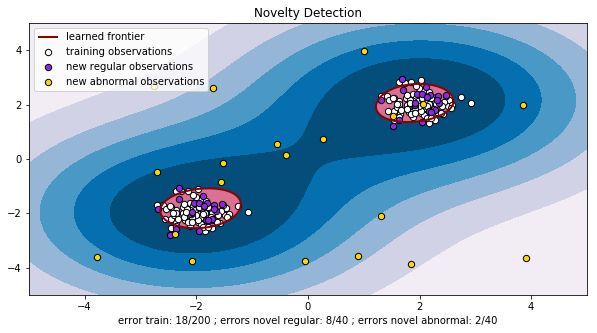

In [22]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (10,5))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c], ["learned frontier", "training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.xlabel("error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40" % (n_error_train, n_error_test, n_error_outliers))
plt.show()

## MNIST Data

ในที่นี้เราจะลอง train ด้วยข้อมูลเลข 3 เท่านั้น แล้วให้มันทายผลเลข 0-9

In [34]:
mndata = MNIST('../../dataset/MNIST')
all_images, all_labels   = mndata.load_training() # 60k img
test_images, test_labels = mndata.load_testing()  # 10k img

In [35]:
all_images, all_labels, test_images, test_labels = np.array(all_images), np.array(all_labels), np.array(test_images), np.array(test_labels)

In [59]:
# number = 3
train_images = all_images[all_labels == 3]
train_labels = all_labels[all_labels == 3]
test3_images = test_images[test_labels == 3]
test3_labels = test_labels[test_labels == 3]
outlier_test_images = test_images[test_labels != 3]
outlier_test_labels = test_labels[test_labels != 3]

In [60]:
print("X train shape :",train_images.shape)
print("Y train shape :",train_labels.shape)
print("X3 test shape :",test3_images.shape)
print("Y3 test shape :",test3_labels.shape)
print("Outlier X test shape :",outlier_test_images.shape)
print("Outlier Y test shape :",outlier_test_labels.shape)

X train shape : (6131, 784)
Y train shape : (6131,)
X3 test shape : (1010, 784)
Y3 test shape : (1010,)
Outlier X test shape : (8990, 784)
Outlier Y test shape : (8990,)


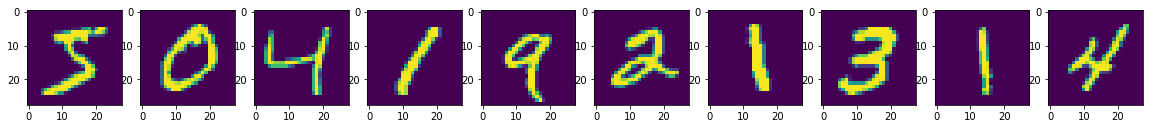

In [61]:
plt.figure(figsize = (20,5))

example = all_images[0:10]
for index in range(len(example)):
    plt.subplot(1,10,index+1)
    plt.imshow(np.resize(example[index],(28,28)))

plt.show()

In [63]:
# fit the model
clf2 = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf2.fit(train_images)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [64]:
# Predict
y_pred_train2 = clf2.predict(train_images)
y_pred_test2 = clf2.predict(test3_images)
y_pred_outliers2 = clf2.predict(outlier_test_images)

ผลจะทายออกมาเป็น 1 (nomally) และ -1 (anomally)

In [67]:
# Error
n_error_train2 = y_pred_train2[y_pred_train2 == -1].size
n_error_test2 = y_pred_test2[y_pred_test2 == -1].size
n_error_outliers2 = y_pred_outliers2[y_pred_outliers2 == 1].size

In [72]:
print("error train: %d/%d" % (n_error_train2,len(y_pred_train2)) )
print("error regular: %d/%d" % (n_error_test2,len(y_pred_test2)) )
print("error abnormal: %d/%d" % (n_error_outliers2,len(y_pred_outliers2)) )

error train: 3678/6131
error regular: 1010/1010
error abnormal: 0/8990
